In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Read the crime data
df = pd.read_csv("processed_dataset.csv")
df.head()

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop,Log_nonViolPerPop,State
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888,0.680567,AK
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134,0.062051,AK
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713,-1.577354,AK
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480,0.492163,AL
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480,0.492163,AL


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1593 entries, 0 to 1592
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   medIncome                1593 non-null   float64
 1   pctWWage                 1593 non-null   float64
 2   perCapInc                1593 non-null   float64
 3   whitePerCap              1593 non-null   float64
 4   blackPerCap              1593 non-null   float64
 5   indianPerCap             1593 non-null   float64
 6   asianPerCap              1593 non-null   float64
 7   otherPerCap              1593 non-null   float64
 8   HispPerCap               1593 non-null   float64
 9   pctPopUnderPov           1593 non-null   float64
 10  PctNotHSGrad             1593 non-null   float64
 11  PctBSorMore              1593 non-null   float64
 12  PctUnemployed            1593 non-null   float64
 13  PctEmploy                1593 non-null   float64
 14  HouseholdSize           

In [4]:
my_df = df[['Log_ViolentCrimesPerPop', 'Log_nonViolPerPop']]
my_df.corr(method='pearson')

,Log_ViolentCrimesPerPop,Log_nonViolPerPop
Log_ViolentCrimesPerPop,1.00000,0.79401
Log_nonViolPerPop,0.79401,1.00000


**Removing: <br>
-Log_NumInShelters, Log_NumStreet, Log_murders, Log_murdPerPop as they have <50% non-null values <br>
-State as it isn't a numeric variable <br>
-Log_nonViolPerPop as it has a strong correlation with Log_ViolentCrimesPerPop. Thus, we chose to use the latter.**

In [5]:
df_new = df.drop(['Log_NumInShelters', 'Log_NumStreet', 'Log_murders', 'Log_murdPerPop', 'State', 'Log_nonViolPerPop'], axis=1)
df_new.head()

,medIncome,pctWWage,perCapInc,whitePerCap,blackPerCap,indianPerCap,asianPerCap,otherPerCap,HispPerCap,pctPopUnderPov,...,Log_assaultPerPop,Log_burglaries,Log_burglPerPop,Log_larcenies,Log_larcPerPop,Log_autoTheft,Log_autoTheftPerPop,Log_arsons,Log_arsonsPerPop,Log_ViolentCrimesPerPop
0,0.876345,1.600432,0.941602,1.159390,0.415994,-0.093158,0.039099,0.835051,0.563030,-0.420409,...,1.091143,2.256699,1.014704,1.968360,0.007233,2.586872,0.764607,2.145875,0.820506,1.989888
1,1.234794,1.437346,1.008933,1.308139,0.480702,-0.121228,-0.063869,0.771022,0.448013,-0.640405,...,-1.606775,-0.706527,-0.978673,-0.417671,-0.795302,0.100167,0.114909,-0.161035,-0.297702,-0.054134
2,-0.197109,1.260783,-0.170482,0.098767,-0.179320,-0.301121,-0.512889,0.059712,-0.383929,0.073097,...,1.128776,0.701692,0.754678,0.180323,-0.009341,0.625712,0.792283,0.867172,1.107332,-0.999713
3,-0.759653,-0.246070,-0.533620,-0.111510,-0.827913,0.023760,0.036641,0.965798,-0.207766,1.060108,...,1.010836,1.623161,1.536764,1.247670,1.088329,1.324566,1.185399,0.976763,0.713426,1.064480
4,-0.860033,-0.837759,-0.739429,-0.833392,-0.602023,-0.510427,1.127371,0.222923,-1.085397,0.687006,...,-0.049729,-0.099189,0.449002,-0.219521,0.602244,-0.377621,0.468178,-0.542571,-0.125260,1.064480


In [7]:
df_new.dropna(inplace=True)
df_new.shape

(1225, 43)

In [ ]:
# df_new.fillna(0, inplace=True)
# df_new.info()

**We will be doing Regression Analysis on the crime dataset 2 times. <br>
1.The first round will be done on all `43 attributes`. <br>
2.The second round will be done after removing attributes with `absolute correlation values of <0.4` (weak ~ no correlation) - obtained from correlation analysis.**

**1.Regression with 43 attributes**

In [8]:
X = df_new.drop(['Log_ViolentCrimesPerPop'], axis=1)
y = df_new['Log_ViolentCrimesPerPop']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

In [10]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [11]:
# y = a + bx
# print a
print(round(lm.intercept_, 2))

-3.89


In [12]:
# print b - beta coefficient
lm.coef_

array([ 2.05063435e-01, -2.19361000e-01,  5.85234767e-02, -2.86436232e-01,
        3.82331175e-02,  3.69419969e-02, -1.42583346e-02, -3.64513817e-02,
        2.28681990e-02, -1.57592693e-01,  1.76997311e-04,  2.48002158e-02,
       -1.74123042e-02, -1.35111652e-02, -1.43578637e-01,  8.57134291e-02,
       -7.12495621e-02, -8.31750800e-03,  5.89675018e-05,  1.35015580e-01,
        5.37190079e-02, -1.11415762e-01, -1.52704565e-01,  3.97102217e-01,
       -3.54093934e-02, -6.10689458e-02, -6.30749625e-03,  1.51375750e-02,
        9.66851331e-03, -1.10013962e-01, -4.87008797e-02,  7.36359300e-02,
       -2.12357268e+02,  1.52152161e+02,  1.63581822e-01, -5.91602568e-02,
       -3.12382267e-01,  3.09897835e-01,  1.35685157e+02, -7.18131330e+01,
        4.37254123e-01, -3.70675481e-01])

In [13]:
# print b - beta coefficient
round(pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients']), 2)

,Coefficients
medIncome,0.21
pctWWage,-0.22
perCapInc,0.06
whitePerCap,-0.29
blackPerCap,0.04
indianPerCap,0.04
asianPerCap,-0.01
otherPerCap,-0.04
HispPerCap,0.02
pctPopUnderPov,-0.16


In [14]:
# use X_test to predict y values
y_pred = lm.predict(X_test)

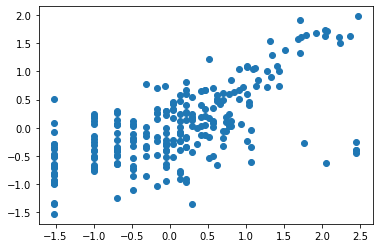

In [15]:
plt.scatter(y_test, y_pred)

**Cross Validation using k-fold**

In [16]:
from sklearn.model_selection import cross_val_score
clf = LinearRegression()

print(np.mean(cross_val_score(clf, X_train, y_train, cv=10)))

0.4222382385376596


**Evaluating the model using rmse and r2**

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred) 

In [18]:
rmse = (np.sqrt(mse))
r2 = r2_score(y_test, y_pred)

In [19]:
rmse # smaller is better

0.7375360981314873

In [20]:
r2 # higher is better
# only approximately 42.77% of the dataset can be explained by the model

0.4277432761462856

**Check Residual Plots for Assumptions of Linear Regression**

In [21]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['residuals'] = results['Actual'] - results['Predicted']

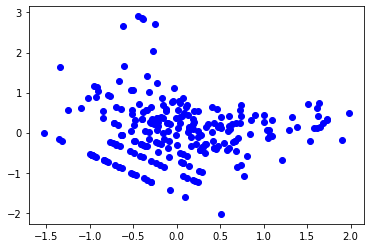

In [22]:
plt.scatter(results['Predicted'], results['residuals'],  color='blue') # no assumption violated

**Get p values to check for significance**

In [23]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)
m1 = mod.fit()
p_values = m1.summary2().tables[1]['P>|t|']

In [24]:
round(p_values, 4)
# whenever p value > 5%, it is statistically insignificant (95% confidence level)

medIncome              0.1583
pctWWage               0.0305
perCapInc              0.8563
whitePerCap            0.2658
blackPerCap            0.3216
indianPerCap           0.1798
asianPerCap            0.6316
otherPerCap            0.2259
HispPerCap             0.5507
pctPopUnderPov         0.0464
PctNotHSGrad           0.9943
PctBSorMore            0.7136
PctUnemployed          0.7430
PctEmploy              0.8720
HouseholdSize          0.0305
TotalPctDiv            0.1189
PctKids2Par            0.4145
PctImmigRecent         0.9186
PctImmigRec5           0.9582
Log_agepct12t21        0.0904
Log_agepct12t29        0.6557
Log_agepct16t24        0.4192
Log_agepct65up         0.0635
Log_Population         0.0258
Log_racepctblack       0.4113
Log_racepctwhite       0.3636
Log_racepctasian       0.8747
Log_racepcthisp        0.7517
Log_NumImmig           0.8952
Log_HousVacant         0.0401
Log_rapes              0.4683
Log_rapesPerPop        0.2261
Log_assaults           0.0000
Log_assaul

**Attributes that are statistically insignificant (do not reject null hypothesis that the variable has no correlation with the predictor variable) and may have correlation to the predictor variable:**

In [25]:
p_values.loc[p_values>0.05]

medIncome           0.158346
perCapInc           0.856256
whitePerCap         0.265836
blackPerCap         0.321606
indianPerCap        0.179818
asianPerCap         0.631637
otherPerCap         0.225917
HispPerCap          0.550730
PctNotHSGrad        0.994302
PctBSorMore         0.713634
PctUnemployed       0.742961
PctEmploy           0.872010
TotalPctDiv         0.118931
PctKids2Par         0.414512
PctImmigRecent      0.918606
PctImmigRec5        0.958156
Log_agepct12t21     0.090394
Log_agepct12t29     0.655681
Log_agepct16t24     0.419169
Log_agepct65up      0.063548
Log_racepctblack    0.411277
Log_racepctwhite    0.363608
Log_racepctasian    0.874725
Log_racepcthisp     0.751684
Log_NumImmig        0.895152
Log_rapes           0.468299
Log_rapesPerPop     0.226115
Log_burglaries      0.698313
Log_burglPerPop     0.851120
Log_larcenies       0.545843
Log_larcPerPop      0.291281
Log_arsons          0.656478
Log_arsonsPerPop    0.557527
Name: P>|t|, dtype: float64

**2.Regression after removing attributes with absolute correlation values of <0.4**

In [26]:
df_new = df_new[['Log_assaultPerPop', 'Log_NumImmig', 'Log_rapes', 'Log_HousVacant', 'Log_burglaries', 'Log_arsons',
                 'Log_assaults', 'Log_Population', 'Log_larcenies', 'Log_autoTheft', 'Log_ViolentCrimesPerPop']]
df_new.head()

,Log_assaultPerPop,Log_NumImmig,Log_rapes,Log_HousVacant,Log_burglaries,Log_arsons,Log_assaults,Log_Population,Log_larcenies,Log_autoTheft,Log_ViolentCrimesPerPop
0,1.091143,1.884843,2.450948,3.004296,2.256699,2.145875,2.155401,2.966901,1.968360,2.586872,1.989888
1,-1.606775,0.200143,0.219266,0.200717,-0.706527,-0.161035,-1.143696,0.037003,-0.417671,0.100167,-0.054134
2,1.128776,0.321331,0.789659,1.026603,0.701692,0.867172,0.922154,0.232294,0.180323,0.625712,-0.999713
3,1.010836,-0.338452,1.005416,0.931406,1.623161,0.976763,1.150486,0.990247,1.247670,1.324566,1.064480
4,-0.049729,-1.841107,-1.173172,-0.353038,-0.099189,-0.542571,-0.452474,-0.872536,-0.219521,-0.377621,1.064480


In [27]:
X = df_new.drop(['Log_ViolentCrimesPerPop'], axis=1)
y = df_new['Log_ViolentCrimesPerPop']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=424)

In [29]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
print(round(lm.intercept_, 2))

-0.11


In [31]:
lm.coef_

array([ 0.00546004, -0.04928512,  0.04920034, -0.0891424 ,  0.10914025,
       -0.11633315,  0.02862368,  0.31504541,  0.26831327,  0.20081597])

In [32]:
round(pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients']), 2)

,Coefficients
Log_assaultPerPop,0.01
Log_NumImmig,-0.05
Log_rapes,0.05
Log_HousVacant,-0.09
Log_burglaries,0.11
Log_arsons,-0.12
Log_assaults,0.03
Log_Population,0.32
Log_larcenies,0.27
Log_autoTheft,0.20


In [33]:
y_pred = lm.predict(X_test)

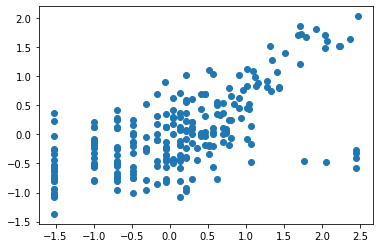

In [34]:
plt.scatter(y_test, y_pred)

**Cross Validation using k-fold**

In [35]:
from sklearn.model_selection import cross_val_score
clf = LinearRegression()

print(np.mean(cross_val_score(clf, X_train, y_train, cv=10))) # slightly larger than Regression 1 (0.4222)

0.45420439640845833


**Evaluating the model using rmse and r2**

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred) 

In [37]:
rmse = (np.sqrt(mse))
r2 = r2_score(y_test, y_pred)

In [38]:
rmse # smaller is better
# slightly smaller than Regression 1 (0.7375)

0.7405302613782218

In [39]:
r2 # higher is better
# slightly smaller than Regression 1 (0.4277)

0.4230874822221685

**Check Residual Plots for Assumptions of Linear Regression**

In [40]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['residuals'] = results['Actual'] - results['Predicted']

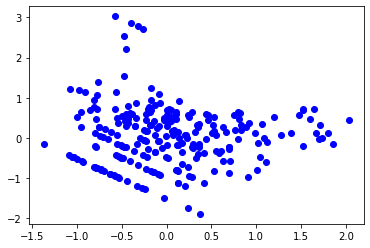

In [41]:
plt.scatter(results['Predicted'], results['residuals'],  color='blue') # no assumption violated

**Get p values to check for significance**

In [42]:
import statsmodels.api as sm

mod = sm.OLS(y_train,X_train)
m1 = mod.fit()
p_values = m1.summary2().tables[1]['P>|t|']

In [43]:
round(p_values, 4)
# whenever p value > 5%, it is statistically insignificant (95% confidence level)

Log_assaultPerPop    0.1788
Log_NumImmig         0.1919
Log_rapes            0.1221
Log_HousVacant       0.0886
Log_burglaries       0.0435
Log_arsons           0.0147
Log_assaults         0.1242
Log_Population       0.3621
Log_larcenies        0.0042
Log_autoTheft        0.0216
Name: P>|t|, dtype: float64

**Attributes that are statistically insignificant (do not reject null hypothesis that the variable has no correlation with the predictor variable) and may have correlation to the predictor variable:**

In [44]:
p_values.loc[p_values>0.05]

Log_assaultPerPop    0.178806
Log_NumImmig         0.191869
Log_rapes            0.122077
Log_HousVacant       0.088584
Log_assaults         0.124248
Log_Population       0.362147
Name: P>|t|, dtype: float64